## Import Libraries

In [1]:
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
all_files=os.listdir()
all_files

['.ipynb_checkpoints',
 'ALL DATA.csv',
 'sales analysis.ipynb',
 'SalesAnalysis.ipynb',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
df=pd.DataFrame()
for i in all_files:
    if(i[0:6]=='Sales_'):
        d=pd.read_csv(i)
        print(i)
        df=pd.concat([df,d])
df.to_csv('ALL DATA.csv',index=False)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
df=pd.read_csv('ALL DATA.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
df.shape

(186850, 6)

In [7]:
df.describe(include='O')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## MISSING VALUES

In [8]:
# as we can see that there are a lot of missing values in each column
len(df[df.isna().any(axis=1)])

545

In [9]:
df.dropna(how='all',inplace=True)
df.shape

(186305, 6)

In [10]:
df=df[df['Order Date'].str[0:2]!='Or']

## Add a month column

In [11]:
#df['Month']=df['Order Date'].str[0:2]
df['Month']=pd.to_datetime(df['Order Date']).dt.month
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])

In [13]:
df.reset_index(inplace=True)

In [14]:
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [15]:
df.drop('index',axis=1,inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [16]:
df['State']=df['Purchase Address'].apply(lambda x:str(x).split(',')[2].split(' ')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,MA
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,CA


In [17]:
df['City']=df['Purchase Address'].apply(lambda x:x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,State,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,TX,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,MA,Boston
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,CA,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,CA,Los Angeles


In [18]:
df.drop(['Purchase Address'],axis=1,inplace=True)

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,State,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,TX,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,MA,Boston
2,176560,Google Phone,1,600,04/12/19 14:38,4,CA,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,CA,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,CA,Los Angeles


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Month             185950 non-null  int64 
 6   State             185950 non-null  object
 7   City              185950 non-null  object
dtypes: int64(2), object(6)
memory usage: 11.3+ MB


In [21]:
df['Price Each']=df['Price Each'].astype('float64')

## monthly sales

In [22]:
df['Sales']=df['Price Each']*df['Quantity Ordered']

In [23]:
monthly_sales=df.groupby(df['Month'])['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
monthly_sales

,Month,Sales
11,12,4.613443e+06
9,10,3.736727e+06
3,4,3.390670e+06
10,11,3.199603e+06
4,5,3.152607e+06
2,3,2.807100e+06
6,7,2.647776e+06
5,6,2.577802e+06
7,8,2.244468e+06
1,2,2.202022e+06


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Sales'>

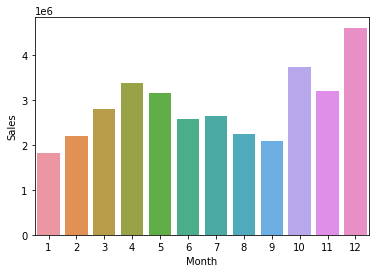

In [24]:
sns.barplot(monthly_sales['Month'],monthly_sales['Sales'])

## From which State had the maximum sale

In [25]:
state_sales=df.groupby(df['State'])['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
state_sales

,State,Sales
0,CA,1.371477e+07
4,NY,4.664317e+06
6,TX,4.587557e+06
2,MA,3.661642e+06
1,GA,2.795499e+06
7,WA,2.747755e+06
5,OR,1.870732e+06
3,ME,4.497583e+05


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='Sales'>

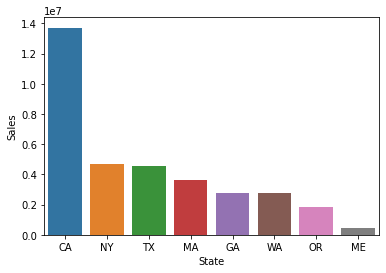

In [26]:
sns.barplot(state_sales['State'],state_sales['Sales'])

## From which city did we receive the maximum orders

In [27]:
city_orders=df.groupby(df['City'])['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered',ascending=False)
city_orders

,City,Quantity Ordered
7,San Francisco,50239
4,Los Angeles,33289
5,New York City,27932
2,Boston,22528
3,Dallas,16730
0,Atlanta,16602
8,Seattle,16553
6,Portland,14053
1,Austin,11153


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' San Francisco'),
  Text(1, 0, ' Los Angeles'),
  Text(2, 0, ' New York City'),
  Text(3, 0, ' Boston'),
  Text(4, 0, ' Dallas'),
  Text(5, 0, ' Atlanta'),
  Text(6, 0, ' Seattle'),
  Text(7, 0, ' Portland'),
  Text(8, 0, ' Austin')])

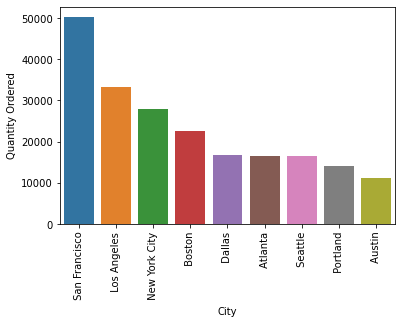

In [28]:
sns.barplot(city_orders['City'],city_orders['Quantity Ordered'])
plt.xticks(rotation=90)


In [29]:
df.loc[df['City']==' San Francisco']['State'].head(1)

5    CA
Name: State, dtype: object

## What time of the day should we display advertisements to maximize likelihood of customer's buying product?

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,State,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,TX,Dallas,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,MA,Boston,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,4,CA,Los Angeles,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,CA,Los Angeles,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,CA,Los Angeles,11.99


In [31]:
df['Hour']=pd.to_datetime(df['Order Date']).dt.hour

In [32]:
hourly_sales=df.groupby(df['Hour'])['Sales'].sum().reset_index().sort_values(by='Hour')
hourly_sales

,Hour,Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='Sales'>

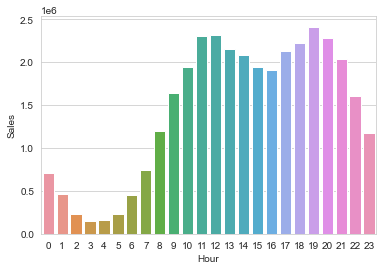

In [33]:
sns.set_style('whitegrid')
sns.barplot(hourly_sales['Hour'],hourly_sales['Sales'])

C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='Sales'>

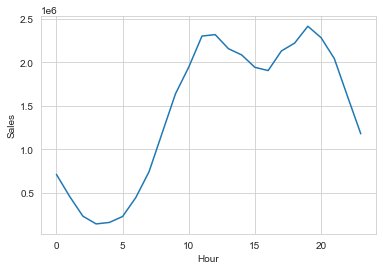

In [34]:
sns.lineplot(hourly_sales['Hour'],hourly_sales['Sales'])

#ans:- before 11 am or after 7 pm

## What products are most often sold together?

In [35]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,State,City,Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,TX,Dallas,23.90,8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,MA,Boston,99.99,22
2,176560,Google Phone,1,600.00,04/12/19 14:38,4,CA,Los Angeles,600.00,14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,CA,Los Angeles,11.99,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,CA,Los Angeles,11.99,9


In [36]:
df2 = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df3 = df2[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-36-f28f0fc3b940>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [39]:
df3.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [52]:
df3['Grouped'].value_counts().sort_values(ascending=False).head(10)

iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: Grouped, dtype: int64

## What product sold the most? Why do you think it sold the most?

In [53]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,State,City,Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,4,TX,Dallas,23.90,8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,4,MA,Boston,99.99,22
2,176560,Google Phone,1,600.00,04/12/19 14:38,4,CA,Los Angeles,600.00,14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,4,CA,Los Angeles,11.99,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,4,CA,Los Angeles,11.99,9


In [61]:
product_sales=df.groupby(['Product']).agg({'Quantity Ordered':'sum','Sales':'sum'}).reset_index()

In [62]:
product_sales

,Product,Quantity Ordered,Sales
0,20in Monitor,4129,454148.71
1,27in 4K Gaming Monitor,6244,2435097.56
2,27in FHD Monitor,7550,1132424.50
3,34in Ultrawide Monitor,6199,2355558.01
4,AA Batteries (4-pack),27635,106118.40
5,AAA Batteries (4-pack),31017,92740.83
6,Apple Airpods Headphones,15661,2349150.00
7,Bose SoundSport Headphones,13457,1345565.43
8,Flatscreen TV,4819,1445700.00
9,Google Phone,5532,3319200.00


In [66]:
product_sales.loc[product_sales['Sales']==np.max(product_sales['Sales'])]['Product']# gave maximum sales

13    Macbook Pro Laptop
Name: Product, dtype: object

In [67]:
product_sales.loc[product_sales['Quantity Ordered']==np.max(product_sales['Quantity Ordered'])]['Product']# were ordered maximum

5    AAA Batteries (4-pack)
Name: Product, dtype: object

<AxesSubplot:>

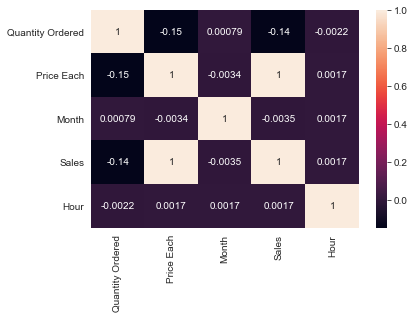

In [68]:
sns.heatmap(df.corr(),annot=True)